<a href="https://colab.research.google.com/github/ahmabboud/Spinal-Implants-Classification/blob/main/Real_To_Xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real To Xray image Daemon


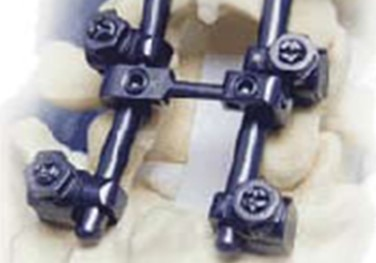

In [ ]:
import cv2
from google.colab.patches import cv2_imshow	
import numpy as np
import matplotlib.pyplot as plt 

path= "drive/MyDrive/Client_DS1/Img/"
# Read an image 
img_bgr = cv2.imread(path+'S_21_1.jpg', 1) #'S_101_2.jpg'
cv2_imshow(img_bgr) 
 




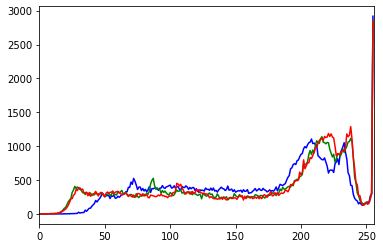

In [ ]:

# Histogram plotting of the image 
color = ('b', 'g', 'r') 

for i, col in enumerate(color): 
	
	histr = cv2.calcHist([img_bgr], 
						[i], None, 
						[256], 
						[0, 256]) 
	
	plt.plot(histr, color = col) 
	
	# Limit X - axis to 256 
	plt.xlim([0, 256]) 
	
plt.show() 

In [ ]:
img_not = cv2.bitwise_not(img_bgr)
cv2_imshow(img_not)

## Convert to Grey

In [ ]:
# Convert to Grey Color
img_grey=cv2.cvtColor(img_not, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_grey)
#plt.imshow(img_grey) 
#plt.show() 


## Increase Brightness

In [ ]:
value=50

grey_new = np.where((255 - img_grey) < value,255,img_grey+value)
cv2_imshow(grey_new)

# Blur Image


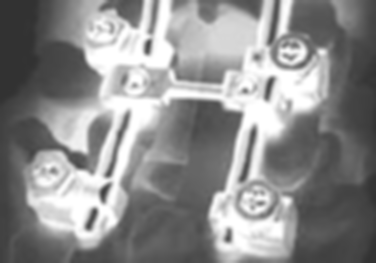

In [ ]:
# make sure that you have saved it in the same folder 
# You can change the kernel size as you want 
blurImg = cv2.blur(grey_new,(5,5))  
cv2_imshow(blurImg)

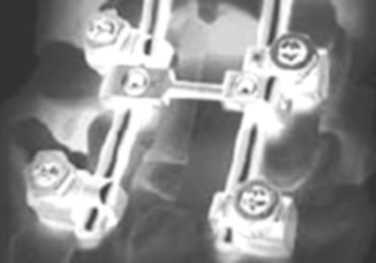

In [ ]:
# Gaussian Blurring 
# Again, you can change the kernel size 
gausBlur = cv2.GaussianBlur(grey_new, (5,5),0)  
cv2_imshow( gausBlur) 

  


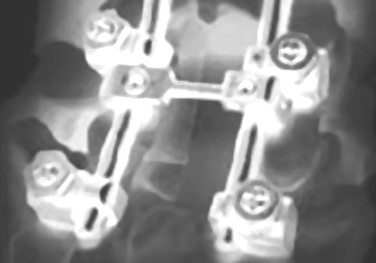

In [ ]:
# Median blurring 
medBlur = cv2.medianBlur(grey_new,5) 
cv2_imshow( medBlur) 

  
 

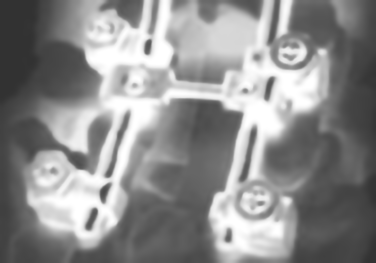

In [ ]:
# Bilateral Filtering 
bilFilter = cv2.bilateralFilter(grey_new,9,75,75) 
cv2_imshow( bilFilter) 


## Extract DS

In [ ]:
#!pip install patool

     |████████████████████████████████| 81kB 3.6MB/s 


In [ ]:
#import patoolib
#patoolib.extract_archive('drive/MyDrive/Client_DS1/Img.rar', outdir='drive/MyDrive/Client_DS1/')
#patoolib.extract_archive('drive/MyDrive/Client_DS1/datasets.rar', outdir='drive/MyDrive/Client_DS1/')

patool: Extracting drive/MyDrive/Client_DS1/datasets.rar ...
patool: running /usr/bin/unrar x -- /content/drive/MyDrive/Client_DS1/datasets.rar
patool:     with cwd='drive/MyDrive/Client_DS1/'
patool: ... drive/MyDrive/Client_DS1/datasets.rar extracted to `drive/MyDrive/Client_DS1/'.


'drive/MyDrive/Client_DS1/'

# Import real image Data from Excel sheet and export them as Xray


In [ ]:
import pandas as pd

df = pd.read_excel ("drive/MyDrive/Client_DS1/EDA_v3.xlsx",sheet_name="Raw Data")
cols=df.iloc[4,:]
df=df[5:]
df.columns=cols
df=df[~df['Image ID'].isnull()]
df.reset_index(drop=True, inplace=True)
df.head(8)

4,Image ID,Type,Manufacturer,Product,ANTERIOR,APNCUT,APPOLY,APROUND,APSCUT,APSQUARE,APYCUT,BSCANNULATED,BSCONIC,BSCONSTANT,BSCUPPED,BSFLUTE,BSIRREGULAR,BSNFLUTE,BSPRONOUNCED,BSRUNOUT,BSSHORT,BSSOLID,BSSTRAIGHT,BSTAPERED,BSTHREADED,CAGE,CERVICAL,CLALLSS,CLEVEN,CLINLINE,CLLATERAL,CLMEDIAL,CLMSLOT,CLNSLOT,CLRSLOT,CLSOLID,CLUNEVEN,CROSSLINK,CSINLINE,CSIRREGULAR,CSOFFSET,FACET,HOOK,HOOKS,LAMINAR,MLABOVE,MLANGLED,MLBELOW,MLEVEN,MLOVERHANG,MLRECTANGULAR,MLROUNDEDB,MLROUNDEDB MLSQUARED,MLROUNDEDT,MLSHARP,MLSQUARED,MLSTEP,MLTAPER,PEDS,RFNONE,RFROD,RFTIP,RPINLINE,RPOFFSET,SACRAL,SPINOUS,SSEXTERNAL,SSINTERNAL,SSMULTI,TLINTERBODY,TLPLATE,WIRE
0,S_2_1.jpg,0,Aesculap,MACS TL Twin-Screw,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,S_2_2.jpg,0,Aesculap,MACS TL Twin-Screw,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,S_2_3.jpg,1,Aesculap,MACS TL Twin-Screw,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,S_2_4.jpg,1,Aesculap,MACS TL Twin-Screw,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,S_2_5.jpg,0,Aesculap,MACS TL Twin-Screw,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,S_2_6.jpg,0,Aesculap,MACS TL Twin-Screw,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,S_3_1.jpg,0,Aesculap,MACS TL HMA Screw,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,S_3_2.jpg,1,Aesculap,MACS TL HMA Screw,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Convert to Xray

In [ ]:
def Real_to_Xray(Real_path,Xray_path):
  img_bgr = cv2.imread(Real_path, 1)  # read image
  img_not = cv2.bitwise_not(img_bgr)  # get negative
  img_grey=cv2.cvtColor(img_not, cv2.COLOR_BGR2GRAY)# Convert to Grey Color
  grey_new = np.where((255 - img_grey) < 50,255,img_grey+50) # increase brightness
  blurImg = cv2.blur(grey_new,(5,5))  # add blurring
  cv2.imwrite(Xray_path, blurImg)  # Saving the image 

## Convert and Save to Xray

In [ ]:
Real_path="drive/MyDrive/Client_DS1/Img/"
Xray_path="drive/MyDrive/Client_DS1/Img_Xray/"

for imgName ,is_Xray in df[['Image ID','Type']].values:
  if int(is_Xray)==0:
    Real_to_Xray(Real_path + imgName, Xray_path + imgName )


## Extract original Xray for Tesy Purpose

In [ ]:
from shutil import copyfile

Real_path="drive/MyDrive/Client_DS1/Img/"
Xray_path="drive/MyDrive/Client_DS1/Img_Xray_Org/"
i=0
for imgName ,is_Xray in df[['Image ID','Type']].values:
  i+=1
  if int(is_Xray)==1:
    copyfile(Real_path +imgName, Xray_path +imgName)
    print(imgName, ".... Copied",i)
print(i," Done!")

    

## Extracting Real image for Cleaning purpose

In [ ]:
from shutil import copyfile

Real_path="drive/MyDrive/Client_DS1/Img/"
Xray_path="drive/MyDrive/Client_DS1/Img_Real/"
i=0
for imgName ,is_Xray in df[['Image ID','Type']].values:
  if int(is_Xray)==0:
    i+=1
    copyfile(Real_path +imgName, Xray_path +imgName)
    print(imgName, ".... Copied",i)
print(i," Done!")